In [1]:
# Import usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.dummy import DummyRegressor # (baseline score)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV

# Using this code bit only to make the notebook cleaner to read
# through. 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

pd.options.mode.chained_assignment = None  # default='warn'

import itertools as it
from sklearn.preprocessing import StandardScaler

In [2]:
# Read training dataset into df
df = pd.read_csv('./datasets/train.csv')
#df = pd.read_csv('./datasets/test.csv')

In [3]:
# View head
df.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900


In [4]:
# Create a dictionary to rename columns
col_name_dict = {'Order':'Order', 'PID':'pid', 'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning',
                 'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area','Street':'street','Alley':'alley',
                 'Lot Shape':'lot_shape', 'Land Contour':'lot_contour', 'Utilities':'utilities',
                 'Lot Config':'lot_config', 'Land Slope':'lot_slope', 'Neighborhood':'neighborhood',
                 'Condition 1':'condition_1','Condition 2':'condition_2', 'Bldg Type':'building_type',
                 'House Style':'house_style', 'Overall Qual':'overall_quality','Overall Cond':'overall_condition',
                 'Year Built':'year_built', 'Year Remod/Add':'year_remodel', 'Roof Style':'roof_style',
                 'Roof Matl':'roof_material', 'Exterior 1st':'exterior_1', 'Exterior 2nd':'exterior_2',
                 'Mas Vnr Type':'masonry_type','Mas Vnr Area':'masonry_area', 'Exter Qual':'external_quality',
                 'Exter Cond':'external_condition', 'Foundation':'foundation', 'Bsmt Qual':'basement_quality',
                 'Bsmt Cond':'basement_condition', 'Bsmt Exposure':'basement_exposure',
                 'BsmtFin Type 1':'basement_fin_type_1', 'BsmtFin SF 1':'basement_fin_sf_1',
                 'BsmtFin Type 2':'basement_fin_type_2', 'BsmtFin SF 2':'basement_fin_sf_2',
                 'Bsmt Unf SF':'basement_unf_sf', 'Total Bsmt SF':'total_basement_sf','Heating':'heating',
                 'Heating QC':'heating_quality', 'Central Air':'central_air', 'Electrical':'electrical',
                 '1st Flr SF':'1st_floor_sf','2nd Flr SF':'2nd_floor_sf', 'Low Qual Fin SF':'low_quality_fin_sf',
                 'Gr Liv Area':'ground_living_sf', 'Bsmt Full Bath':'basement_full_bath',
                 'Bsmt Half Bath':'basement_half_bath', 'Full Bath':'full_bath', 'Half Bath':'half_bath',
                 'Bedroom AbvGr':'bedroom_above_ground','Kitchen AbvGr':'kitchen_above_ground',
                 'Kitchen Qual':'kitchen_quality', 'TotRms AbvGrd':'total_rooms_above_ground', 
                 'Functional':'functional','Fireplaces':'fireplace', 'Fireplace Qu':'fireplace_quality',
                 'Garage Type':'garage_type', 'Garage Yr Blt':'garage_year_built','Garage Finish':'garage_fin',
                 'Garage Cars':'garage_cars', 'Garage Area':'garage_area', 'Garage Qual':'garage_quality',
                 'Garage Cond':'garage_condition', 'Paved Drive':'paved_drive', 'Wood Deck SF':'wood_deck_sf',
                 'Open Porch SF':'open_porch_sf','Enclosed Porch':'enclosed_porch', '3Ssn Porch':'3ssn_porch',
                 'Screen Porch':'screen_porch', 'Pool Area':'pool_area', 'Pool QC':'pool_quality','Fence':'fence',
                 'Misc Feature':'misc_feature', 'Misc Val':'misc_value', 'Mo Sold':'month_sold',
                 'Yr Sold':'year_sold', 'Sale Type':'sale_type','Sale Condition':'sale_condition',
                 'SalePrice':'sale_price'}

In [5]:
# rename columns
df = df.rename(columns=col_name_dict)

In [6]:
df.shape

(2197, 82)

In [7]:
df.head(3)

,Order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,lot_contour,...,pool_area,pool_quality,fence,misc_feature,misc_value,month_sold,year_sold,sale_type,sale_condition,sale_price
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [8]:
# Check nulls
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False)

pool_quality           0.994538
misc_feature           0.963587
alley                  0.934911
fence                  0.809285
fireplace_quality      0.485207
lot_frontage           0.164770
garage_condition       0.055530
garage_quality         0.055530
garage_fin             0.055530
garage_year_built      0.055530
garage_type            0.054620
basement_exposure      0.031406
basement_fin_type_2    0.030951
basement_fin_type_1    0.030496
basement_quality       0.030496
basement_condition     0.030496
masonry_area           0.010014
masonry_type           0.010014
basement_half_bath     0.000455
basement_full_bath     0.000455
total_basement_sf      0.000455
basement_unf_sf        0.000455
garage_cars            0.000455
garage_area            0.000455
basement_fin_sf_2      0.000455
basement_fin_sf_1      0.000455
electrical             0.000455
dtype: float64

Clean data

In [9]:
# 4 columns has over 80% of missing values (we can drop these)
df = df.drop(['pool_quality','alley','misc_feature','fence'], axis=1)

In [10]:
# Check nulls
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False).index

Index(['fireplace_quality', 'lot_frontage', 'garage_quality', 'garage_fin',
       'garage_year_built', 'garage_condition', 'garage_type',
       'basement_exposure', 'basement_fin_type_2', 'basement_fin_type_1',
       'basement_quality', 'basement_condition', 'masonry_area',
       'masonry_type', 'garage_area', 'garage_cars', 'basement_half_bath',
       'basement_fin_sf_1', 'basement_full_bath', 'electrical',
       'basement_unf_sf', 'basement_fin_sf_2', 'total_basement_sf'],
      dtype='object')

In [11]:
# missing fireplace_quality means no fireplace at all - impute with 'NA'
df.groupby(['fireplace_quality'],dropna=False)[['fireplace']].agg([pd.Series.mode,'count'])

fireplace      
                       mode count
fireplace_quality                
Ex                        1    30
Fa                        1    50
Gd                        1   564
Po                        1    33
TA                        1   454
NaN                       0  1066

Clean data

In [12]:
df['fireplace_quality'] = df['fireplace_quality'].fillna('None')

Clean data

In [13]:
# Impute as 'None' and 0
df['masonry_type'].fillna('None',inplace=True)
df['masonry_area'].fillna(0,inplace=True)

In [14]:
# Check nulls
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False)

lot_frontage           0.164770
garage_year_built      0.055530
garage_quality         0.055530
garage_fin             0.055530
garage_condition       0.055530
garage_type            0.054620
basement_exposure      0.031406
basement_fin_type_2    0.030951
basement_quality       0.030496
basement_fin_type_1    0.030496
basement_condition     0.030496
basement_fin_sf_1      0.000455
basement_fin_sf_2      0.000455
basement_unf_sf        0.000455
total_basement_sf      0.000455
basement_full_bath     0.000455
basement_half_bath     0.000455
garage_cars            0.000455
garage_area            0.000455
electrical             0.000455
dtype: float64

In [15]:
# missing lot frontage
df.groupby(['lot_frontage'],dropna=False)[['lot_area','lot_shape','lot_config']].agg([pd.Series.mode,'count'])

lot_area       lot_shape       lot_config      
                       mode count      mode count       mode count
lot_frontage                                                      
21.0                   1680    34       Reg    34     Inside    34
24.0                   2280    32       Reg    32     Inside    32
25.0                   4835     1       IR1     1    CulDSac     1
26.0          [8773, 10943]     2       IR2     2        FR2     2
28.0                   7296     1       IR1     1    CulDSac     1
...                     ...   ...       ...   ...        ...   ...
182.0                 14572     1       IR3     1     Corner     1
195.0                 41600     1       IR1     1        FR2     1
200.0                 43500     1       Reg     1     Inside     1
313.0                 63887     1       IR3     1     Corner     1
NaN                    7500   362       IR1   362     Inside   362

[123 rows x 6 columns]

Mode lot area for missing lot frontage: 7500
Mode lot area for missing lot frontage: IR1
Mode lot frontage for 7500,IR1 : nan


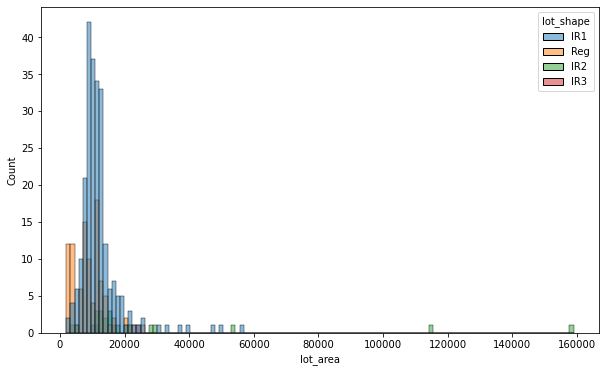

In [16]:
# Majority of missing values seems to be
# lot_shape = IR1
# lot_area = 7,500

print(f"Mode lot area for missing lot frontage: {df[df['lot_frontage'].isnull()]['lot_area'].mode()[0]}")
print(f"Mode lot area for missing lot frontage: {df[df['lot_frontage'].isnull()]['lot_shape'].mode()[0]}")

print(f"Mode lot frontage for 7500,IR1 : {df[(df['lot_area'] == 7500) & (df['lot_shape']=='IR1')]['lot_frontage'].mean()}")

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x='lot_area',data=df[df['lot_frontage'].isnull()], hue='lot_shape');

In [17]:
# Let's try to impute with lot_frontage missing with 74
# for lot_shape of IR1 and lot_area of approx. 7000

df[(df['lot_area']>7000) & (df['lot_area']<8000)].groupby(['lot_shape'])[['lot_area','lot_frontage']].agg([pd.Series.mode,'mean','count'])

lot_area                    lot_frontage                 
              mode         mean count         mode       mean count
lot_shape                                                          
IR1           7180  7545.690909    55         74.0  63.926829    41
Reg           7200  7474.327160   162         60.0  63.040268   149

Clean data

In [18]:
# impute with 69 (the mode for this group of lot area and lot shape)
df['lot_frontage'].fillna(0,inplace=True) # filling with mode increases the RMSE

In [19]:
# everything is missing for the case of garage group - meaning no garage at all
df[df['garage_condition'].isnull()][['garage_type', 'garage_year_built', 'garage_fin', 'garage_cars',
       'garage_area', 'garage_quality', 'garage_condition']]

,garage_type,garage_year_built,garage_fin,garage_cars,garage_area,garage_quality,garage_condition
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
43,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
61,NaN,NaN,NaN,0.0,0.0,NaN,NaN
63,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
2121,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2144,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2153,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2175,NaN,NaN,NaN,0.0,0.0,NaN,NaN


Clean data

In [20]:
# impute garage type as missing values
df['garage_type'].fillna('NA',inplace=True)
df['garage_year_built'].fillna('NA',inplace=True)
df['garage_fin'].fillna('NA',inplace=True)
df['garage_quality'].fillna('NA',inplace=True)
df['garage_condition'].fillna('NA',inplace=True)
df['garage_cars'].fillna(0,inplace=True)
df['garage_area'].fillna(0,inplace=True)

In [21]:
# Check nulls
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False)

basement_exposure      0.031406
basement_fin_type_2    0.030951
basement_quality       0.030496
basement_condition     0.030496
basement_fin_type_1    0.030496
basement_fin_sf_1      0.000455
basement_fin_sf_2      0.000455
basement_unf_sf        0.000455
total_basement_sf      0.000455
electrical             0.000455
basement_full_bath     0.000455
basement_half_bath     0.000455
dtype: float64

In [22]:
# everything is missing for the case of basement group - meaning no basement at all
df[df['basement_exposure'].isnull()][['basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_sf_1', 'basement_fin_type_2',
       'basement_fin_sf_2', 'basement_unf_sf', 'total_basement_sf',
       'basement_full_bath', 'basement_half_bath']]

,basement_quality,basement_condition,basement_exposure,basement_fin_type_1,basement_fin_sf_1,basement_fin_type_2,basement_fin_sf_2,basement_unf_sf,total_basement_sf,basement_full_bath,basement_half_bath
99,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
141,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
162,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
165,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
168,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2024,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2043,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2059,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


Clean data

In [23]:
# Impute values that represent no basement
df['basement_quality'].fillna('NA',inplace=True)
df['basement_condition'].fillna('NA',inplace=True)
df['basement_exposure'].fillna('NA',inplace=True)
df['basement_fin_type_1'].fillna('NA',inplace=True)
df['basement_fin_type_2'].fillna('NA',inplace=True)
df['basement_fin_sf_1'].fillna(0,inplace=True) #mode
df['basement_fin_sf_2'].fillna(0,inplace=True) #mode
df['basement_unf_sf'].fillna(0,inplace=True) #mode
df['basement_full_bath'].fillna(0,inplace=True)
df['basement_half_bath'].fillna(0,inplace=True)
df['total_basement_sf'].fillna(0,inplace=True)

In [24]:
# Utilities that is 'AllPub' can be impute with the mode of SBrkr
df.groupby(['utilities','electrical']).agg(['count'])[['Order']]

Order
                     count
utilities electrical      
AllPub    FuseA        128
          FuseF         38
          FuseP          6
          Mix            1
          SBrkr       2020
NoSeWa    FuseA          1
NoSewr    FuseA          2

In [25]:
df['electrical'].fillna('SBrkr',inplace=True)

In [26]:
df.isnull().mean()[df.isnull().mean() > 0]

Series([], dtype: float64)

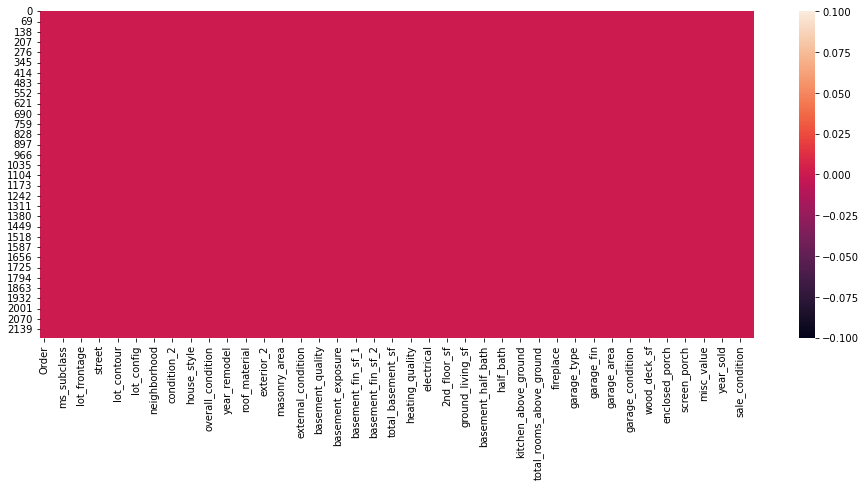

In [27]:
plt.figure(figsize=(16,6))

sns.heatmap(df.isnull());

In [28]:
df.shape

(2197, 78)

## Columns Cleaning

#### ID Group

Clean data

In [29]:
df.drop(columns=['Order','pid'],inplace=True)

#### Lot Group

In [30]:
lot_cols = df.columns[df.columns.str.contains('lot')]
df[lot_cols].head(5)

,lot_frontage,lot_area,lot_shape,lot_contour,lot_config,lot_slope
0,80.0,9605,Reg,Lvl,Corner,Gtl
1,90.0,14684,IR1,Lvl,CulDSac,Gtl
2,0.0,14375,IR1,Lvl,CulDSac,Gtl
3,48.0,6472,Reg,Lvl,Inside,Gtl
4,61.0,9734,IR1,Lvl,Inside,Gtl


In [31]:
lot_cols = df.columns[df.columns.str.contains('lot')]
df[lot_cols].head(5)

,lot_frontage,lot_area,lot_shape,lot_contour,lot_config,lot_slope
0,80.0,9605,Reg,Lvl,Corner,Gtl
1,90.0,14684,IR1,Lvl,CulDSac,Gtl
2,0.0,14375,IR1,Lvl,CulDSac,Gtl
3,48.0,6472,Reg,Lvl,Inside,Gtl
4,61.0,9734,IR1,Lvl,Inside,Gtl


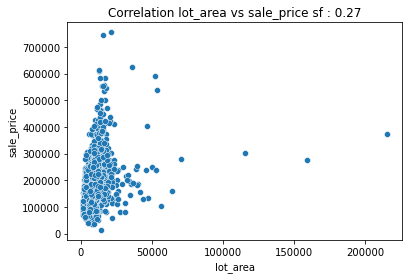

In [32]:
# check correlation of ground_living_sf and basement_total_sf

corr = df[['lot_area','sale_price']].corr()

sns.scatterplot(x='lot_area',y='sale_price',data=df)
plt.title(f"Correlation lot_area vs sale_price sf : {corr['lot_area'][1].round(2)}");

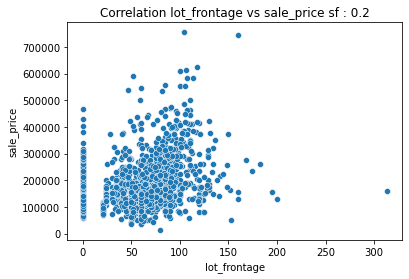

In [33]:
# check correlation of ground_living_sf and basement_total_sf

corr = df[['lot_frontage','sale_price']].corr()

sns.scatterplot(x='lot_frontage',y='sale_price',data=df)
plt.title(f"Correlation lot_frontage vs sale_price sf : {corr['lot_frontage'][1].round(2)}");

#### SF Group (Square Footage)

In [34]:
sf_cols = df.columns[df.columns.str.contains('sf')]
df[sf_cols].head(5)

,basement_fin_sf_1,basement_fin_sf_2,basement_unf_sf,total_basement_sf,1st_floor_sf,2nd_floor_sf,low_quality_fin_sf,ground_living_sf,wood_deck_sf,open_porch_sf
0,0.0,0.0,1218.0,1218.0,1218,0,0,1218,0,178
1,485.0,177.0,1496.0,2158.0,2196,0,0,2196,84,70
2,111.0,354.0,354.0,819.0,1344,0,0,1344,0,118
3,0.0,0.0,1451.0,1451.0,1456,0,0,1456,192,42
4,241.0,113.0,30.0,384.0,744,630,0,1374,0,0


Clean data

In [35]:
# check if we actually need basement_fin_sf and basement_unf_sf

# create a column of 'has_basement'
df['has_basement_sf'] = df['total_basement_sf'].apply(lambda x : 1 if x > 0 else 0)

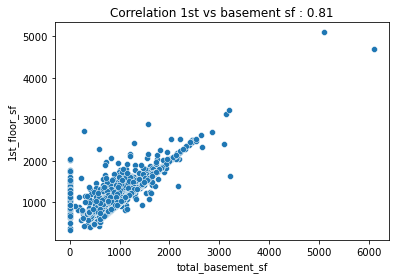

In [36]:
# check correlation of ground_living_sf and basement_total_sf

corr = df[['total_basement_sf','1st_floor_sf']].corr()

sns.scatterplot(x='total_basement_sf',y='1st_floor_sf',data=df)
plt.title(f"Correlation 1st vs basement sf : {corr['total_basement_sf'][1].round(2)}");

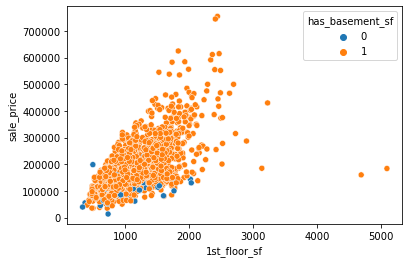

In [37]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='1st_floor_sf',y='sale_price',data=df,hue='has_basement_sf');

__Intepretation:__
- Total basement sf correlates highly with 1st floor sf
- Houses with the same ground_living_sf sells better if they have basement
- But majority of the houses actually has basement anyway

__Takeaway:__
- Could drop this because most houses has basement
- And basement_sf correlates to ground sf anyway, therefore we can probably drop this column
- Leave only the version of 'has_basement'

In [38]:
# Mostly empty so we will drop this column
df['low_quality_fin_sf'].value_counts().head(5)

0      2172
80        3
360       2
392       1
514       1
Name: low_quality_fin_sf, dtype: int64

Clean data

In [39]:
df.drop(columns=['low_quality_fin_sf'], inplace=True)

In [40]:
# Create has 2nd floor column to keep 2nd floor, and combine
df['has_2nd_floor_sf'] = df['2nd_floor_sf'].apply(lambda x : 0 if x == 0 else 1)

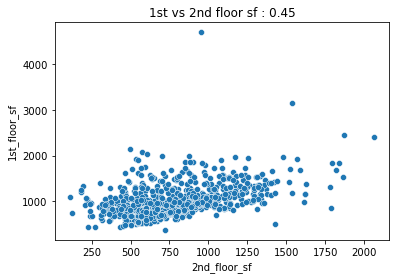

In [41]:
# check correlation of ground_living_sf and basement_total_sf

corr = df[df['2nd_floor_sf'] > 0][['2nd_floor_sf','1st_floor_sf']].corr()

sns.scatterplot(x='2nd_floor_sf',y='1st_floor_sf',data=df[df['2nd_floor_sf'] > 0])
plt.title(f"1st vs 2nd floor sf : {corr['2nd_floor_sf'][1].round(2)}");

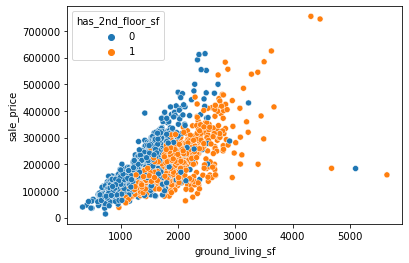

In [42]:
# plot scatter of sale_price and ground_living_area

sns.scatterplot(x='ground_living_sf',y='sale_price',data=df,hue='has_2nd_floor_sf');

__Intepretation:__
- Square footage of 2nd floor correlates with 1st floor, slightly (0.45)
- For houses with similar square footage : 2 floors will be cheaper than 1 floor

__Takeaway:__
- 2nd floor sf correlates quite significantly with 1st floor sf
- We can only keep has_2nd_floor_sf
- keep ground_living_sf because it's a summation of 1st_floor_sf and 2nd_floor_sf

In [43]:
sf_cols = df.columns[df.columns.str.contains('sf')]
df[sf_cols].head(5)

,basement_fin_sf_1,basement_fin_sf_2,basement_unf_sf,total_basement_sf,1st_floor_sf,2nd_floor_sf,ground_living_sf,wood_deck_sf,open_porch_sf,has_basement_sf,has_2nd_floor_sf
0,0.0,0.0,1218.0,1218.0,1218,0,1218,0,178,1,0
1,485.0,177.0,1496.0,2158.0,2196,0,2196,84,70,1,0
2,111.0,354.0,354.0,819.0,1344,0,1344,0,118,1,0
3,0.0,0.0,1451.0,1451.0,1456,0,1456,192,42,1,0
4,241.0,113.0,30.0,384.0,744,630,1374,0,0,1,1


Clean data

In [44]:
df.drop(columns=['basement_fin_sf_1','basement_fin_sf_2','basement_unf_sf'], inplace=True)

In [45]:
# These columnn are represented by 'ground_living_area' so we can drop these
df.drop(columns=['1st_floor_sf','2nd_floor_sf'], inplace=True)

In [46]:
sf_cols = df.columns[df.columns.str.contains('sf')]
df[sf_cols].head(5)

,total_basement_sf,ground_living_sf,wood_deck_sf,open_porch_sf,has_basement_sf,has_2nd_floor_sf
0,1218.0,1218,0,178,1,0
1,2158.0,2196,84,70,1,0
2,819.0,1344,0,118,1,0
3,1451.0,1456,192,42,1,0
4,384.0,1374,0,0,1,1


Combine total square footage and drop redundant column

Clean data

In [47]:
df['total_sf'] = df['total_basement_sf'] + df['ground_living_sf']

In [48]:
df[['total_sf','total_basement_sf','ground_living_sf','sale_price']].corr()

,total_sf,total_basement_sf,ground_living_sf,sale_price
total_sf,1.000000,0.837586,0.872977,0.778508
total_basement_sf,0.837586,1.000000,0.464726,0.629605
ground_living_sf,0.872977,0.464726,1.000000,0.699675
sale_price,0.778508,0.629605,0.699675,1.000000


Clean data

In [49]:
# We can drop total basement sf and ground living sf
df.drop(columns=['total_basement_sf','ground_living_sf'],inplace=True)

#### Bathroom Group

In [50]:
lot_cols = df.columns[df.columns.str.contains('bath')]
df[lot_cols].head(5)

,basement_full_bath,basement_half_bath,full_bath,half_bath
0,0.0,0.0,1,1
1,0.0,0.0,2,0
2,0.0,1.0,1,0
3,0.0,0.0,2,0
4,0.0,0.0,2,1


In [51]:
df['basement_full_bath'].value_counts()

0.0    1294
1.0     873
2.0      28
3.0       2
Name: basement_full_bath, dtype: int64

In [52]:
df['basement_half_bath'].value_counts()

0.0    2061
1.0     133
2.0       3
Name: basement_half_bath, dtype: int64

In [53]:
df['full_bath'].value_counts()

2    1187
1     945
3      56
0       6
4       3
Name: full_bath, dtype: int64

In [54]:
df['half_bath'].value_counts()

0    1404
1     774
2      19
Name: half_bath, dtype: int64

Clean data

In [55]:
# Create combined column
df['total_bath'] = df['full_bath'] + df['half_bath']*0.5

In [56]:
# Combine basement bath
df['total_basement_bath'] = df['basement_full_bath'] + df['basement_half_bath']*0.5

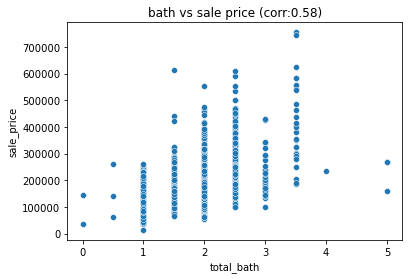

In [57]:
# Some correlation
corr = df[['total_bath','sale_price']].corr().round(2)

plt.title(f"bath vs sale price (corr:{corr['total_bath'][1]})")
sns.scatterplot(x='total_bath',y='sale_price',data=df);

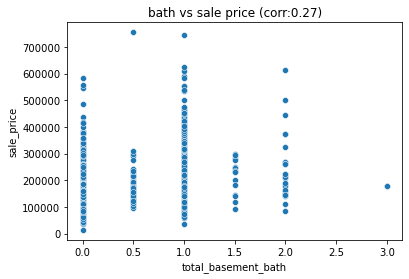

In [58]:
# Some correlation
corr = df[['total_basement_bath','sale_price']].corr().round(2)

plt.title(f"bath vs sale price (corr:{corr['total_basement_bath'][1]})")
sns.scatterplot(x='total_basement_bath',y='sale_price',data=df);

Clean data

In [59]:
df['all_bath'] = df['total_bath']+df['total_basement_bath']

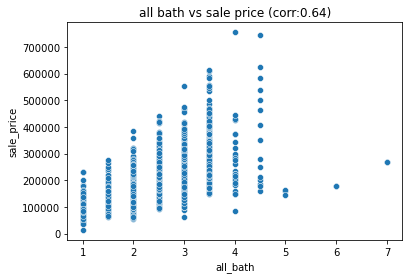

In [60]:
# Some correlation
corr = df[['all_bath','sale_price']].corr().round(2)

plt.title(f"all bath vs sale price (corr:{corr['all_bath'][1]})")
sns.scatterplot(x='all_bath',y='sale_price',data=df);

__Interpretation:__
- Total Bath seems somewhat correlated with (0.58)
- Total Basement bath doesn't seem correlated (0.27)
- All Bath is more correlated (0.64)

In [61]:
df.columns[df.columns.str.contains('bath')]

Index(['basement_full_bath', 'basement_half_bath', 'full_bath', 'half_bath',
       'total_bath', 'total_basement_bath', 'all_bath'],
      dtype='object')

Clean data

In [62]:
df.drop(columns=['basement_full_bath', 'basement_half_bath', 'full_bath', 'half_bath',
       'total_bath', 'total_basement_bath'],inplace=True)

In [63]:
lot_cols = df.columns[df.columns.str.contains('bath')]
df[lot_cols].head(5)

,all_bath
0,1.5
1,2.0
2,1.5
3,2.0
4,2.5


#### Above Ground Group

In [64]:
lot_cols = df.columns[df.columns.str.contains('above')]
df[lot_cols].head(5)

,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground
0,3,1,6
1,3,1,7
2,3,1,7
3,2,1,6
4,3,1,7


In [65]:
#not sure what to do with this one yet

In [66]:
df[['bedroom_above_ground','sale_price']].corr()

,bedroom_above_ground,sale_price
bedroom_above_ground,1.000000,0.144923
sale_price,0.144923,1.000000


In [67]:
df[['total_rooms_above_ground','sale_price']].corr()

,total_rooms_above_ground,sale_price
total_rooms_above_ground,1.000000,0.486375
sale_price,0.486375,1.000000


In [68]:
df[['kitchen_above_ground','sale_price']].corr()

,kitchen_above_ground,sale_price
kitchen_above_ground,1.000000,-0.129349
sale_price,-0.129349,1.000000


In [69]:
# They don't seem to make up one or the other, so we can keep it as it is for now

#### Porch group

In [70]:
porch_cols = df.columns[df.columns.str.contains('porch')]
df[lot_cols].head(5)

,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground
0,3,1,6
1,3,1,7
2,3,1,7
3,2,1,6
4,3,1,7


In [71]:
porch_cols

Index(['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], dtype='object')

In [72]:
# About 57% has open porch
pd.Series(df['open_porch_sf']>0).mean()

0.567592171142467

In [73]:
# About 57% has open porch
pd.Series(df['enclosed_porch']>0).mean()

0.15430131998179336

In [74]:
# About 57% has open porch
pd.Series(df['3ssn_porch']>0).mean()

0.012289485662266727

In [75]:
# About 57% has open porch
pd.Series(df['screen_porch']>0).mean()

0.08557123350022758

Clean data

In [76]:
df['porch_sf'] = df['open_porch_sf']+df['enclosed_porch']+df['3ssn_porch']+df['screen_porch']

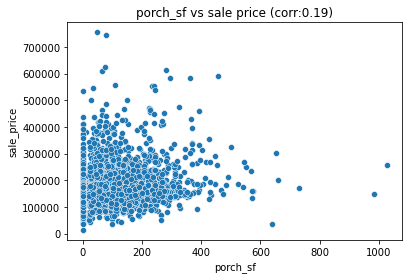

In [77]:
# Some correlation
corr = df[['porch_sf','sale_price']].corr().round(2)

plt.title(f"porch_sf vs sale price (corr:{corr['porch_sf'][1]})")
sns.scatterplot(x='porch_sf',y='sale_price',data=df);

Clean data

In [78]:
df['has_porch'] = df['porch_sf'].apply(lambda x : 1 if x > 0 else 0)

In [79]:
df[['has_porch','sale_price']].corr()

,has_porch,sale_price
has_porch,1.000000,0.298882
sale_price,0.298882,1.000000


In [80]:
df['has_porch'].value_counts(normalize=True)

1    0.706418
0    0.293582
Name: has_porch, dtype: float64

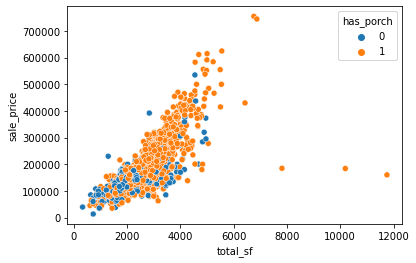

In [81]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_porch');

Clean data

In [82]:
df['has_open_porch'] = df['open_porch_sf'].apply(lambda x : 1 if x > 0 else 0)

In [83]:
df[['has_open_porch','open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'porch_sf', 'has_porch','sale_price']].corr()['sale_price']

has_open_porch    0.435172
open_porch_sf     0.320682
enclosed_porch   -0.147630
3ssn_porch        0.031649
screen_porch      0.119207
porch_sf          0.190424
has_porch         0.298882
sale_price        1.000000
Name: sale_price, dtype: float64

__Interpretation:__
- above 70% of houses `has_porch`
- But from the mix, we can see that it doesn't really influence the `sale_price`
- `has_open_porch` is actually the one that correlates most with the prices
- let's keep only `has_open_porch`

Clean data

In [84]:
df.drop(columns=['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'porch_sf', 'has_porch'],inplace=True)

#### Year group

In [85]:
df['built-remodel'] = df['year_remodel']-df['year_built']

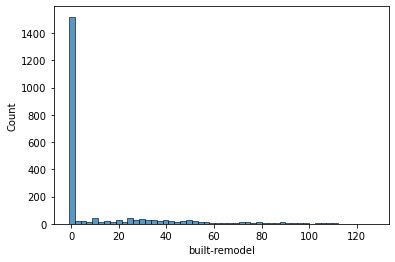

In [86]:
sns.histplot(x='built-remodel',data=df);

In [87]:
df['built-remodel'].value_counts(normalize=True)

0      0.535275
1      0.156122
30     0.010924
40     0.010469
25     0.009558
         ...   
105    0.000455
121    0.000455
66     0.000455
59     0.000455
122    0.000455
Name: built-remodel, Length: 115, dtype: float64

In [88]:
df[['year_built','year_remodel','year_sold','sale_price']].corr()['sale_price']

year_built      0.559975
year_remodel    0.531341
year_sold      -0.024833
sale_price      1.000000
Name: sale_price, dtype: float64

__Interpretation:__
- 50% of houses has no `year_remodel` i.e. same year as `year_built`
- It would be a duplicate of columns so we will only keep `year_built` as it has higher correlation
- keep `year_sold` for now since it doesn't correlate with other columns

Clean data

In [89]:
df.drop(columns=['year_remodel'],inplace=True)

In [90]:
df.drop(columns=['built-remodel'],inplace=True)

In [91]:
df.select_dtypes(exclude=object).columns

Index(['ms_subclass', 'lot_frontage', 'lot_area', 'overall_quality',
       'overall_condition', 'year_built', 'masonry_area',
       'bedroom_above_ground', 'kitchen_above_ground',
       'total_rooms_above_ground', 'fireplace', 'garage_cars', 'garage_area',
       'wood_deck_sf', 'pool_area', 'misc_value', 'month_sold', 'year_sold',
       'sale_price', 'has_basement_sf', 'has_2nd_floor_sf', 'total_sf',
       'all_bath', 'has_open_porch'],
      dtype='object')

In [92]:
df.select_dtypes(exclude=object).head(5)

,ms_subclass,lot_frontage,lot_area,overall_quality,overall_condition,year_built,masonry_area,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground,...,pool_area,misc_value,month_sold,year_sold,sale_price,has_basement_sf,has_2nd_floor_sf,total_sf,all_bath,has_open_porch
0,20,80.0,9605,7,6,2007,0.0,3,1,6,...,0,0,4,2009,159000,1,0,2436.0,1.5,1
1,20,90.0,14684,7,7,1990,234.0,3,1,7,...,0,0,6,2009,271900,1,0,4354.0,2.0,1
2,20,0.0,14375,6,6,1958,541.0,3,1,7,...,0,0,1,2009,137500,1,0,2163.0,1.5,1
3,120,48.0,6472,9,5,2008,500.0,2,1,6,...,0,0,4,2009,248500,1,0,2907.0,2.0,1
4,80,61.0,9734,7,5,2004,0.0,3,1,7,...,0,0,5,2009,167000,1,1,1758.0,2.5,0


#### Investigate fireplace

Clean data

In [93]:
# create has fireplace 
df['has_fireplace'] = df['fireplace'].apply(lambda x:1 if x > 0 else 0)

In [94]:
df[['fireplace','has_fireplace','sale_price']].corr()

,fireplace,has_fireplace,sale_price
fireplace,1.000000,0.897820,0.485029
has_fireplace,0.897820,1.000000,0.487979
sale_price,0.485029,0.487979,1.000000


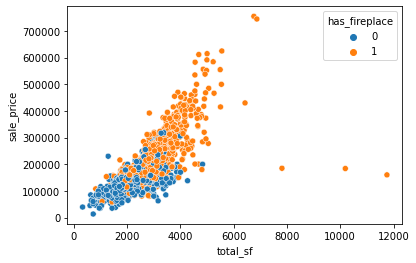

In [95]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_fireplace');

__Interpretation__
- Seem like houses with similar square footage will sell more expensively if they have fireplace
- And from correlation, we can see that the no. of fireplace doesn't really matter
- What matters is whether the house has fireplace or not

__Key Takeaway:__
- We can convert `fireplace` column to `has_fireplace`

Clean data

In [96]:
df.drop(columns=['fireplace'],inplace=True)

#### Garage Group

In [97]:
df[['garage_cars', 'garage_area','sale_price']].corr()

,garage_cars,garage_area,sale_price
garage_cars,1.000000,0.889199,0.643682
garage_area,0.889199,1.000000,0.637089
sale_price,0.643682,0.637089,1.000000


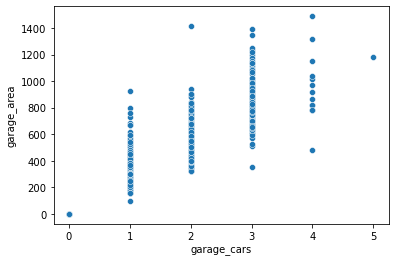

In [98]:
sns.scatterplot(x='garage_cars',y='garage_area',data=df);

__Interpretation:__
- Garage cars actually correlates to garage area
- We can only keep one of them
- Since `garage_cars` is sligthly more correlated with `sale_price` we will keep `garage_cars`

Clean data

In [99]:
df.drop(columns=['garage_area'],inplace=True)

#### Wood Deck

Clean data

In [100]:
df['has_wood_deck'] = df['wood_deck_sf'].apply(lambda x : 1 if x > 0 else 0)

In [101]:
df[['wood_deck_sf','has_wood_deck','sale_price']].corr()

,wood_deck_sf,has_wood_deck,sale_price
wood_deck_sf,1.000000,0.790066,0.343644
has_wood_deck,0.790066,1.000000,0.324547
sale_price,0.343644,0.324547,1.000000


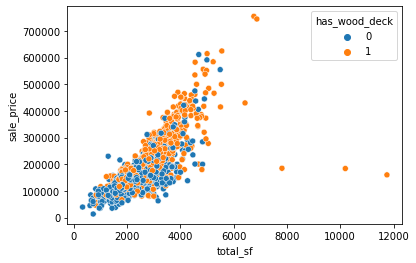

In [102]:
# plot scatter of sale_price and has_basement

sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='has_wood_deck');

__Interpretation__
- Seem like houses with similar square footage will sell more expensively if they have wood deck
- Although it's not as clear as other features e.g. fireplace
- We can see that `has_wood_deck` houses has higher `sale_price` in general
- `has_wood_deck` also correlates better with sale price

__Key Takeaway:__
- keep `has_wood_deck` drop `wood_deck_sf`

Clean data

In [103]:
df.drop(columns=['wood_deck_sf'],inplace=True)

#### Pool

In [104]:
df['pool_area'].value_counts()

0      2185
738       1
576       1
555       1
480       1
512       1
648       1
368       1
519       1
144       1
800       1
561       1
228       1
Name: pool_area, dtype: int64

Clean data

In [105]:
# Majority of houses has no pool - let's drop
df.drop(columns=['pool_area'],inplace=True)

#### Misc

In [106]:
df['misc_value'].value_counts()

0        2119
400        12
500        11
450         6
2000        6
600         6
700         5
650         3
1200        3
2500        2
1500        2
480         2
620         1
455         1
1512        1
17000       1
1000        1
560         1
80          1
12500       1
300         1
6500        1
8300        1
1400        1
460         1
420         1
3000        1
750         1
15500       1
4500        1
3500        1
1150        1
Name: misc_value, dtype: int64

Clean data

In [107]:
# Majority of houses has no misc value - let's drop
df.drop(columns=['misc_value'],inplace=True)

In [108]:
df.drop(columns=['ms_subclass'],inplace=True)

In [109]:
df[df.select_dtypes(exclude=object).columns].head(5)

,lot_frontage,lot_area,overall_quality,overall_condition,year_built,masonry_area,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground,garage_cars,month_sold,year_sold,sale_price,has_basement_sf,has_2nd_floor_sf,total_sf,all_bath,has_open_porch,has_fireplace,has_wood_deck
0,80.0,9605,7,6,2007,0.0,3,1,6,2.0,4,2009,159000,1,0,2436.0,1.5,1,0,0
1,90.0,14684,7,7,1990,234.0,3,1,7,3.0,6,2009,271900,1,0,4354.0,2.0,1,1,1
2,0.0,14375,6,6,1958,541.0,3,1,7,2.0,1,2009,137500,1,0,2163.0,1.5,1,1,0
3,48.0,6472,9,5,2008,500.0,2,1,6,2.0,4,2009,248500,1,0,2907.0,2.0,1,1,1
4,61.0,9734,7,5,2004,0.0,3,1,7,2.0,5,2009,167000,1,1,1758.0,2.5,0,0,0


### Check numerical columns

In [110]:
df.select_dtypes(exclude=object)

,lot_frontage,lot_area,overall_quality,overall_condition,year_built,masonry_area,bedroom_above_ground,kitchen_above_ground,total_rooms_above_ground,garage_cars,month_sold,year_sold,sale_price,has_basement_sf,has_2nd_floor_sf,total_sf,all_bath,has_open_porch,has_fireplace,has_wood_deck
0,80.0,9605,7,6,2007,0.0,3,1,6,2.0,4,2009,159000,1,0,2436.0,1.5,1,0,0
1,90.0,14684,7,7,1990,234.0,3,1,7,3.0,6,2009,271900,1,0,4354.0,2.0,1,1,1
2,0.0,14375,6,6,1958,541.0,3,1,7,2.0,1,2009,137500,1,0,2163.0,1.5,1,1,0
3,48.0,6472,9,5,2008,500.0,2,1,6,2.0,4,2009,248500,1,0,2907.0,2.0,1,1,1
4,61.0,9734,7,5,2004,0.0,3,1,7,2.0,5,2009,167000,1,1,1758.0,2.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,80.0,10041,8,5,1992,0.0,3,1,8,2.0,2,2006,220000,1,1,2823.0,3.5,1,1,1
2193,70.0,6300,5,4,1938,88.0,3,1,7,1.0,7,2009,160000,1,1,2100.0,1.5,0,1,0
2194,41.0,12460,7,5,1999,0.0,4,1,8,2.0,5,2008,225000,1,1,3359.0,2.5,1,1,1
2195,85.0,10625,5,5,1920,0.0,2,1,5,1.0,5,2010,83000,1,0,1293.0,1.0,0,0,0


In [111]:
df.select_dtypes(exclude=object).columns

Index(['lot_frontage', 'lot_area', 'overall_quality', 'overall_condition',
       'year_built', 'masonry_area', 'bedroom_above_ground',
       'kitchen_above_ground', 'total_rooms_above_ground', 'garage_cars',
       'month_sold', 'year_sold', 'sale_price', 'has_basement_sf',
       'has_2nd_floor_sf', 'total_sf', 'all_bath', 'has_open_porch',
       'has_fireplace', 'has_wood_deck'],
      dtype='object')

In [112]:
# Create log_sale_price
df['log_sale_price'] = df['sale_price'].apply(np.log)

In [113]:
df.corr()[['log_sale_price']].sort_values(by='log_sale_price',ascending=False)

,log_sale_price
log_sale_price,1.000000
sale_price,0.945548
overall_quality,0.831278
total_sf,0.770939
garage_cars,0.679208
all_bath,0.668361
year_built,0.624406
has_fireplace,0.519794
total_rooms_above_ground,0.481543
has_open_porch,0.472291


Clean data

In [114]:
df['log_lot_area'] = df['lot_area'].apply(np.log)

### Clean Outliers

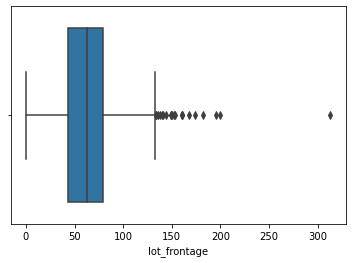

In [115]:
sns.boxplot(x='lot_frontage',data=df);

In [116]:
# Consider removing this outlier
df = df[df['lot_frontage']<150]

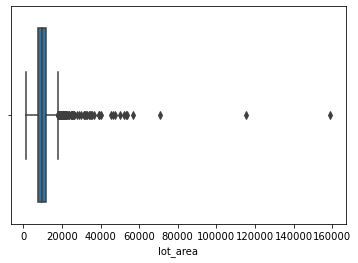

In [117]:
sns.boxplot(x='lot_area',data=df);

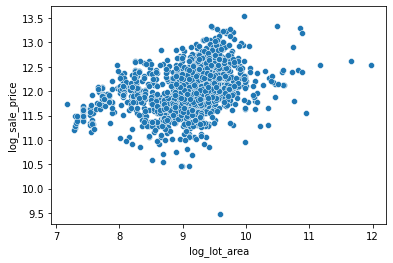

In [118]:
sns.scatterplot(x='log_lot_area',y='log_sale_price',data=df);

In [119]:
df.drop(index=[332,1242],inplace=True)

In [120]:
df[['lot_area']].sort_values('lot_area',ascending=False).head(10)

,lot_area
1153,159000
1548,115149
1348,70761
2141,53504
1590,53107
366,51974
215,50102
1562,46589
442,45600
192,40094


In [121]:
# Consider removing this outlier
df = df[df['lot_area']<70000]

Clean data

In [122]:
# Convert year_built to string
df['year_built'] = df['year_built'].apply(lambda x : str(x))

In [123]:
# Convert month_sold to string
df['month_sold'] = df['month_sold'].apply(lambda x : str(x))

In [124]:
df.drop(columns=['lot_area'],inplace=True)

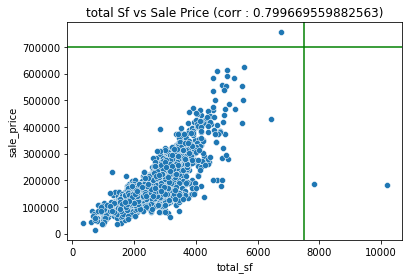

In [125]:
# plot scatter of sale_price and has_basement
plt.axvline(x=7500,color='green')
plt.axhline(y=700000,color='green')
cor = df[['total_sf','sale_price']].corr()
plt.title(f"total Sf vs Sale Price (corr : {cor['sale_price'][0]})")
sns.scatterplot(x='total_sf',y='sale_price',data=df);

In [126]:
df = df[df['sale_price']<700000]

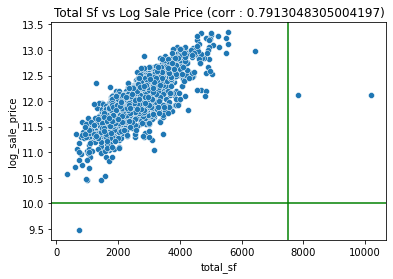

In [127]:
# plot scatter of sale_price and has_basement
plt.axvline(x=7500,color='green')
plt.axhline(y=10,color='green')
cor = df[['total_sf','log_sale_price']].corr()
plt.title(f"Total Sf vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_sf',y='log_sale_price',data=df);

In [128]:
# Remove outlier in log_sale_price
df = df[df['log_sale_price'] > 10]

In [129]:
# Check big house but cheap sale_price
df[(df['total_sf']>7500) & (df['sale_price']<300000)]

,ms_zoning,lot_frontage,street,lot_shape,lot_contour,utilities,lot_config,lot_slope,neighborhood,condition_1,...,sale_price,has_basement_sf,has_2nd_floor_sf,total_sf,all_bath,has_open_porch,has_fireplace,has_wood_deck,log_sale_price,log_lot_area
192,RL,130.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,...,184750,1,1,7814.0,4.5,1,1,1,12.126759,10.598982
1630,RL,128.0,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,...,183850,1,0,10190.0,4.0,1,1,1,12.121875,10.578725


In [130]:
# drop these two (1)
df.drop(index=[192,1630],inplace=True)

In [131]:
# Check small houses
df[['total_sf','sale_price']].sort_values(by='total_sf').head(5)
# keep for now

,total_sf,sale_price
1447,334.0,39300
168,612.0,45000
285,640.0,84900
1521,660.0,63900
1069,720.0,72500


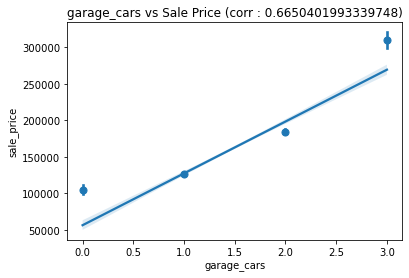

In [132]:
# plot scatter of sale_price and has_basement

cor = df[df['garage_cars']<4][['garage_cars','sale_price']].corr()
plt.title(f"garage_cars vs Sale Price (corr : {cor['sale_price'][0]})")
sns.regplot(x='garage_cars',y='sale_price',data=df[df['garage_cars']<4],x_estimator=np.mean);

In [133]:
df = df[df['garage_cars']<4]

In [134]:
df.select_dtypes(exclude=object).columns

Index(['lot_frontage', 'overall_quality', 'overall_condition', 'masonry_area',
       'bedroom_above_ground', 'kitchen_above_ground',
       'total_rooms_above_ground', 'garage_cars', 'year_sold', 'sale_price',
       'has_basement_sf', 'has_2nd_floor_sf', 'total_sf', 'all_bath',
       'has_open_porch', 'has_fireplace', 'has_wood_deck', 'log_sale_price',
       'log_lot_area'],
      dtype='object')

In [135]:
# remove overall quality 1 outliers
df = df[df['overall_quality'] > 1]

In [136]:
# remove total room outlier
df = df[df['total_rooms_above_ground']<14]

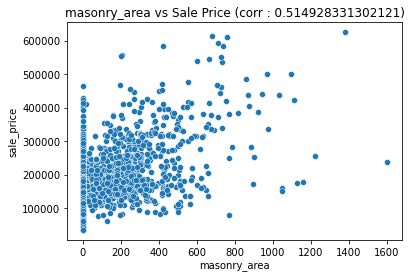

In [137]:
# plot scatter of sale_price and has_basement
cor = df[['masonry_area','sale_price']].corr()
plt.title(f"masonry_area vs Sale Price (corr : {cor['sale_price'][0]})")
sns.scatterplot(x='masonry_area',y='sale_price',data=df);

In [138]:
# trying remove > 1000
df = df[df['masonry_area'] < 1000]

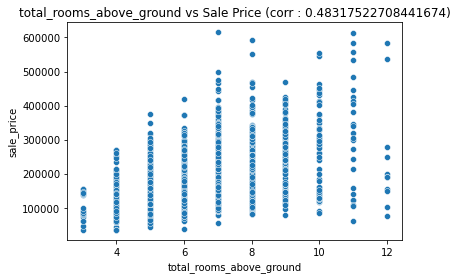

In [139]:
# plot scatter of sale_price and has_basement
cor = df[['total_rooms_above_ground','sale_price']].corr()
plt.title(f"total_rooms_above_ground vs Sale Price (corr : {cor['sale_price'][0]})")
sns.scatterplot(x='total_rooms_above_ground',y='sale_price',data=df);

In [140]:
# try removing too many rooms but low price
df = df[df['total_rooms_above_ground'] < 12]

In [141]:
# remove all bath outliers (trying 4)
df = df[df['all_bath']<5]

In [142]:
# remove total_sf outlier
df = df[df['total_sf'] < 6000]

In [143]:
df[(df['total_sf']<3000) & (df['sale_price']>350000)]

,ms_zoning,lot_frontage,street,lot_shape,lot_contour,utilities,lot_config,lot_slope,neighborhood,condition_1,...,sale_price,has_basement_sf,has_2nd_floor_sf,total_sf,all_bath,has_open_porch,has_fireplace,has_wood_deck,log_sale_price,log_lot_area
2135,RL,60.0,Pave,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,392000,1,0,2838.0,3.0,0,1,1,12.879017,8.99826


In [144]:
# remove small total_sf high price outlier
df.drop(index=[1061,1122],inplace=True)

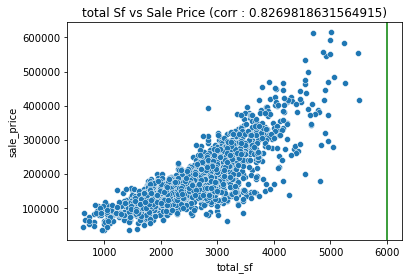

In [145]:
# plot scatter of sale_price and has_basement
plt.axvline(x=6000,color='green')
cor = df[['total_sf','sale_price']].corr()
plt.title(f"total Sf vs Sale Price (corr : {cor['sale_price'][0]})")
sns.scatterplot(x='total_sf',y='sale_price',data=df);

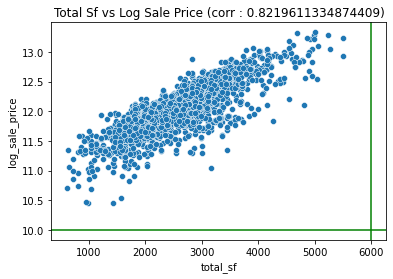

In [146]:
# plot scatter of sale_price and has_basement
plt.axvline(x=6000,color='green')
plt.axhline(y=10,color='green')
cor = df[['total_sf','log_sale_price']].corr()
plt.title(f"Total Sf vs Log Sale Price (corr : {cor['log_sale_price'][0]})")
sns.scatterplot(x='total_sf',y='log_sale_price',data=df);

## Categorical

In [147]:
df['ms_zoning'].value_counts(normalize=True)

RL         0.775587
RM         0.155869
FV         0.051643
C (all)    0.008920
RH         0.007512
I (all)    0.000469
Name: ms_zoning, dtype: float64

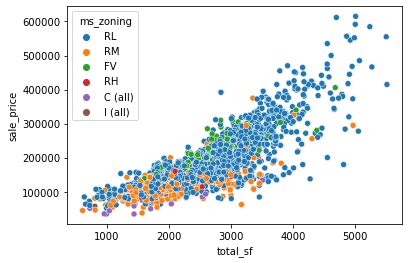

In [148]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='ms_zoning');

Clean data

In [149]:
# Group residential and none
df['ms_zoning'] = df['ms_zoning'].apply(lambda x : 'Res' if x in ['RL','RM','FV','RH','RP'] else 'Non')

In [150]:
df['ms_zoning'].value_counts(normalize=True)

Res    0.99061
Non    0.00939
Name: ms_zoning, dtype: float64

In [151]:
df['street'].value_counts(dropna=False,normalize=True)

Pave    0.996244
Grvl    0.003756
Name: street, dtype: float64

<AxesSubplot:xlabel='total_sf', ylabel='sale_price'>

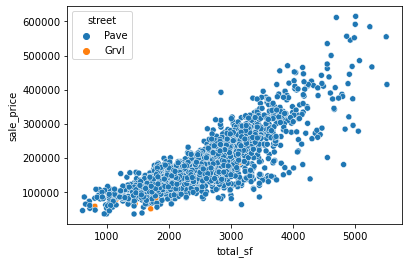

In [152]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='street')

In [153]:
df['lot_shape'].value_counts(dropna=False,normalize=True)

Reg    0.636150
IR1    0.334272
IR2    0.026291
IR3    0.003286
Name: lot_shape, dtype: float64

Clean data

In [154]:
df['lot_shape'] = df['lot_shape'].apply(lambda x : 'Reg' if x == 'Reg' else 'IR')

<AxesSubplot:xlabel='total_sf', ylabel='sale_price'>

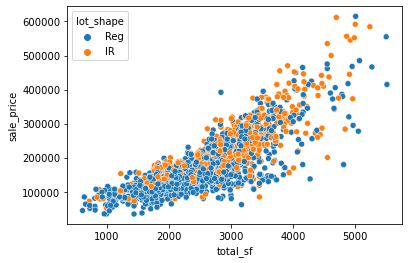

In [155]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='lot_shape')

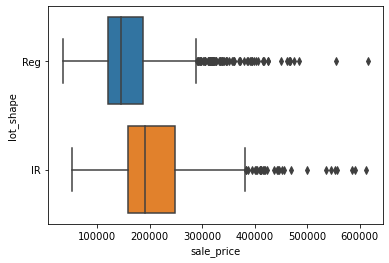

In [156]:
sns.boxplot(x='sale_price',y='lot_shape',data=df,orient='h');

In [157]:
df['lot_contour'].value_counts(dropna=False,normalize=True)

Lvl    0.908451
HLS    0.038498
Bnk    0.036150
Low    0.016901
Name: lot_contour, dtype: float64

In [158]:
df['lot_contour'].value_counts(dropna=False)

Lvl    1935
HLS      82
Bnk      77
Low      36
Name: lot_contour, dtype: int64

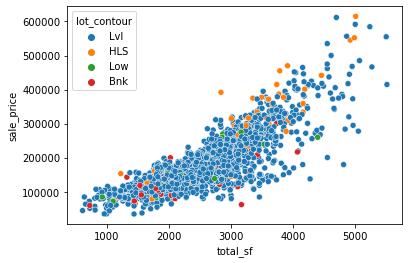

In [159]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='lot_contour');

In [160]:
df['lot_contour'] = df['lot_contour'].apply(lambda x : 'level' if x == 'Lvl' else 'Not')

In [161]:
df['lot_slope'].value_counts(dropna=False,normalize=True)

Gtl    0.955399
Mod    0.040376
Sev    0.004225
Name: lot_slope, dtype: float64

In [162]:
df['lot_slope'].value_counts(dropna=False)

Gtl    2035
Mod      86
Sev       9
Name: lot_slope, dtype: int64

In [163]:
df['lot_slope'] = df['lot_slope'].apply(lambda x : 'Gtl' if x == 'Gtl' else 'Not')

<AxesSubplot:xlabel='total_sf', ylabel='sale_price'>

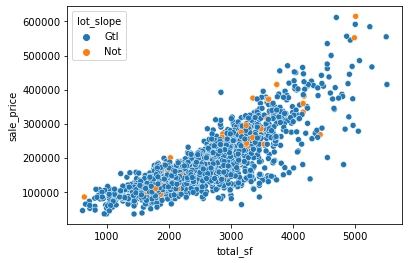

In [164]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='lot_slope')

In [165]:
df['building_type'].value_counts(dropna=False,normalize=True)

1Fam      0.830986
TwnhsE    0.082160
Duplex    0.034742
Twnhs     0.031455
2fmCon    0.020657
Name: building_type, dtype: float64

<AxesSubplot:xlabel='total_sf', ylabel='sale_price'>

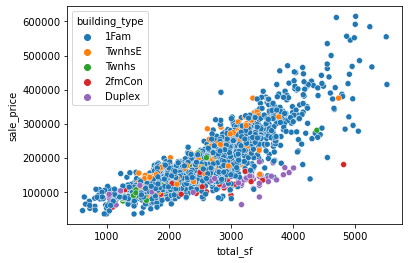

In [166]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='building_type')

In [167]:
def map_building_type(string):
    build_dict = {'1Fam':'1_fam','2fmCon':'2_fam_condo','Duplex':'duplex','TwnhsE':'townhouse','Twnhs':'townhouse'}
    return build_dict[string]

In [168]:
df['building_type'] = df['building_type'].apply(map_building_type)

In [169]:
df['house_style'].value_counts(dropna=False,normalize=True)

1Story    0.515962
2Story    0.295305
1.5Fin    0.100000
SLvl      0.045070
SFoyer    0.028638
2.5Unf    0.007042
1.5Unf    0.006573
2.5Fin    0.001408
Name: house_style, dtype: float64

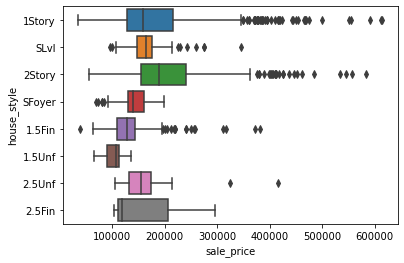

In [170]:
sns.boxplot(x='sale_price',y='house_style',data=df,orient='h');

In [171]:
def map_house_style(string):
    house_dict = {'1Story':'1','1.5Fin':'1','1.5Unf':'1','2.5Fin':'2','2.5Unf':'2','2Story':'2','SLvl':'S','SFoyer':'S'}
    return house_dict[string]

In [172]:
df['house_style'] = df['house_style'].apply(map_house_style)

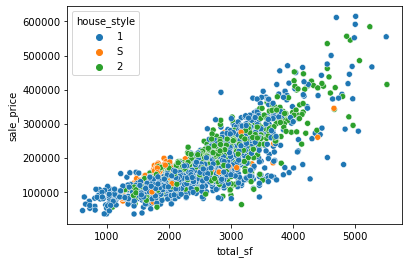

In [173]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='house_style');

In [174]:
df['heating_quality'].value_counts(dropna=False,normalize=True)

Ex    0.514085
TA    0.288732
Gd    0.165258
Fa    0.030986
Po    0.000939
Name: heating_quality, dtype: float64

In [175]:
df['heating_quality'] = df['heating_quality'].apply(lambda x : 'Fa' if x == 'Po' else x)

In [176]:
df['central_air'].value_counts(dropna=False,normalize=True)

Y    0.933803
N    0.066197
Name: central_air, dtype: float64

In [177]:
df['central_air'] = df['central_air'].apply(lambda x : 1 if x == 'Y' else 0)

In [178]:
df['kitchen_quality'].value_counts(dropna=False,normalize=True)

TA    0.505164
Gd    0.398122
Ex    0.072300
Fa    0.023944
Po    0.000469
Name: kitchen_quality, dtype: float64

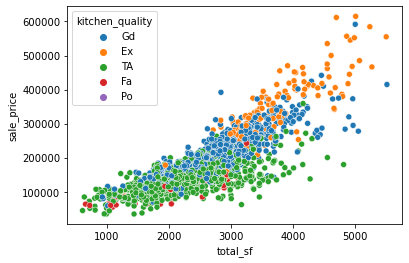

In [179]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='kitchen_quality');

In [180]:
df['kitchen_quality'] = df['kitchen_quality'].apply(lambda x : x if (x=='Gd') or (x=='Ex') else 'Ta')

In [181]:
df['garage_fin'].value_counts(dropna=False,normalize=True)

Unf    0.413146
RFn    0.287324
Fin    0.246948
NA     0.052582
Name: garage_fin, dtype: float64

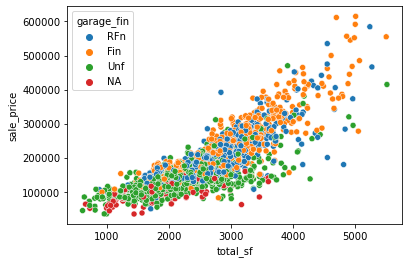

In [182]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='garage_fin');

In [183]:
df['garage_fin'] = df['garage_fin'].apply(lambda x : 'Unf' if (x=='NA') else x)

In [184]:
df['condition_1'].value_counts()

Norm      1842
Feedr      115
Artery      61
RRAn        38
PosN        30
RRAe        18
PosA        14
RRNe         6
RRNn         6
Name: condition_1, dtype: int64

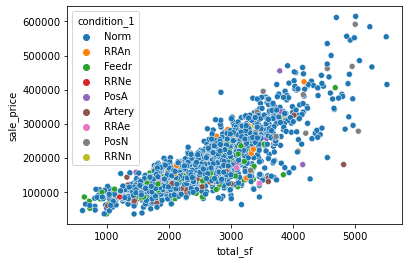

In [185]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='condition_1');

In [186]:
def map_condition_1(string):
    condition_dict = {'Norm':'N','Feedr':'F','Artery':'A','RRAn':'R','RRNe':'R','RRAe':'R','RRNn':'R','PosA':'P','PosN':'P'}
    return condition_dict[string]

In [187]:
df['condition_1'] = df['condition_1'].apply(map_condition_1)

In [188]:
df['sale_type'].value_counts()

WD       1837
New       179
COD        63
ConLD      21
CWD         9
ConLw       6
ConLI       6
Oth         5
Con         3
VWD         1
Name: sale_type, dtype: int64

In [189]:
def sale_type_map(string):
    condition_dict = {'WD ':'W','VWD':'W','CWD':'W','New':'N','COD':'COD','ConLD':'CON','ConLw':'CON',
                     'Con':'CON','ConLI':'CON','Oth':'CON'}
    return condition_dict[string]

In [190]:
df['sale_type'] = df['sale_type'].apply(sale_type_map)

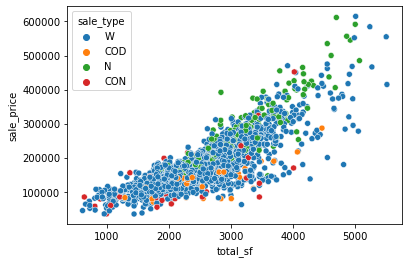

In [191]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='sale_type');

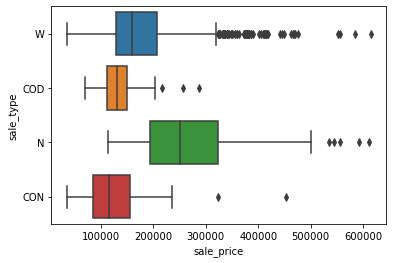

In [192]:
sns.boxplot(x='sale_price',y='sale_type',data=df,orient='h');

In [193]:
df['sale_condition'].value_counts()

Normal     1763
Partial     184
Abnorml     128
Family       32
Alloca       14
AdjLand       9
Name: sale_condition, dtype: int64

In [194]:
def sale_cond_map(string):
    condition_dict = {'Normal':'N','Partial':'P','Abnorml':'Other','Family':'Other','Alloca':'Other'
                      ,'AdjLand':'Other'}
    return condition_dict[string]

In [195]:
df['sale_condition'] = df['sale_condition'].apply(sale_cond_map)

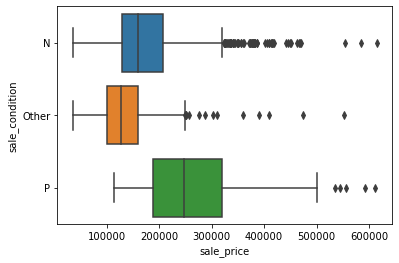

In [196]:
sns.boxplot(x='sale_price',y='sale_condition',data=df,orient='h');

In [197]:
df['roof_style'].value_counts()

Gable      1695
Hip         393
Gambrel      19
Flat         16
Mansard       5
Shed          2
Name: roof_style, dtype: int64

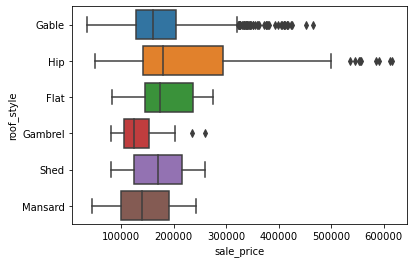

In [198]:
sns.boxplot(x='sale_price',y='roof_style',data=df,orient='h');

In [199]:
def roof_style_map(string):
    roof_dict = {'Gable':'G','Hip':'H','Flat':'O','Gambrel':'O','Shed':'O','Mansard':'O'}
    return roof_dict[string]

In [200]:
df['roof_style'] = df['roof_style'].apply(roof_style_map)

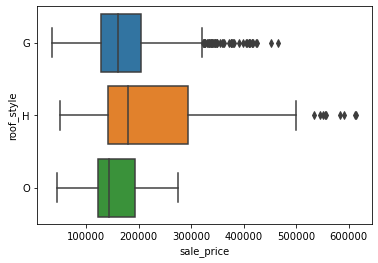

In [201]:
sns.boxplot(x='sale_price',y='roof_style',data=df,orient='h');

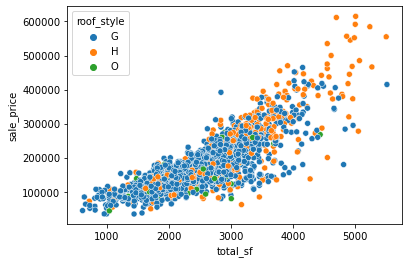

In [202]:
sns.scatterplot(x='total_sf',y='sale_price',data=df,hue='roof_style');

In [203]:
df['masonry_type'].value_counts()

None       1293
BrkFace     635
Stone       184
BrkCmn       17
CBlock        1
Name: masonry_type, dtype: int64

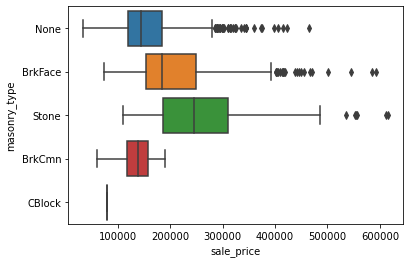

In [204]:
sns.boxplot(x='sale_price',y='masonry_type',data=df,orient='h');

In [205]:
def mason_type_map(string):
    mason_dict = {'None':'N','BrkFace':'B','BrkCmn':'B','CBlock':'B','Stone':'S'}
    return mason_dict[string]

In [206]:
df['masonry_type'] = df['masonry_type'].apply(mason_type_map)

In [207]:
df['functional'].value_counts()

Typ     1980
Min2      56
Min1      48
Mod       24
Maj1      14
Maj2       7
Sev        1
Name: functional, dtype: int64

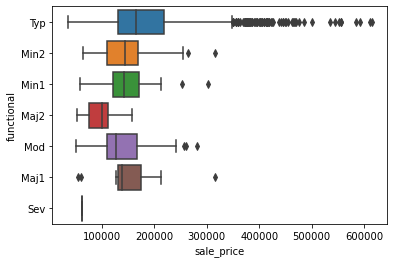

In [208]:
sns.boxplot(x='sale_price',y='functional',data=df,orient='h');

In [209]:
df['functional'] = df['functional'].apply(lambda x : 1 if x == 'Typ' else 0)

In [210]:
df['garage_type'].value_counts()

Attchd     1289
Detchd      553
BuiltIn     128
NA          110
Basment      27
2Types       14
CarPort       9
Name: garage_type, dtype: int64

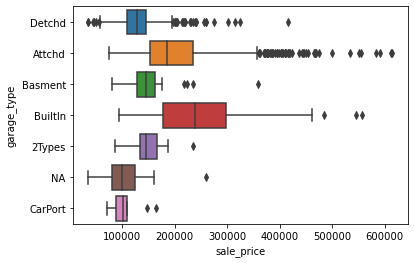

In [211]:
sns.boxplot(x='sale_price',y='garage_type',data=df,orient='h');

In [212]:
def garage_type_map(string):
    garage_dict = {'Detchd':'D','Attchd':'A','BuiltIn':'B','Basment':'O','2Types':'O','NA':'O','CarPort':'O'}
    return garage_dict[string]

In [213]:
df['garage_type'] = df['garage_type'].apply(garage_type_map)

In [214]:
df['garage_quality'].value_counts()

TA    1905
NA     112
Fa      88
Gd      18
Po       5
Ex       2
Name: garage_quality, dtype: int64

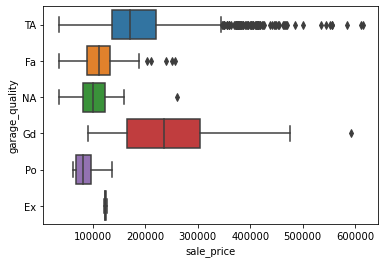

In [215]:
sns.boxplot(x='sale_price',y='garage_quality',data=df,orient='h');

In [216]:
def garage_q_map(string):
    garage_q_dict = {'TA':'A','Gd':'G','Fa':'O','NA':'O','Po':'O','Ex':'O'}
    return garage_q_dict[string]

In [217]:
df['garage_quality'] = df['garage_quality'].apply(garage_q_map)

In [218]:
df.select_dtypes(include=object).columns

Index(['ms_zoning', 'street', 'lot_shape', 'lot_contour', 'utilities',
       'lot_config', 'lot_slope', 'neighborhood', 'condition_1', 'condition_2',
       'building_type', 'house_style', 'year_built', 'roof_style',
       'roof_material', 'exterior_1', 'exterior_2', 'masonry_type',
       'external_quality', 'external_condition', 'foundation',
       'basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_type_2', 'heating',
       'heating_quality', 'electrical', 'kitchen_quality', 'fireplace_quality',
       'garage_type', 'garage_year_built', 'garage_fin', 'garage_quality',
       'garage_condition', 'paved_drive', 'month_sold', 'sale_type',
       'sale_condition'],
      dtype='object')

# Run model to check numerical model

In [219]:
num_cols = list(df.select_dtypes(exclude=object).columns)

In [220]:
cat_cols = ['external_quality','heating_quality','kitchen_quality','garage_fin','lot_shape','building_type',
            'house_style','lot_slope','condition_1','ms_zoning','street','sale_type','sale_condition',
            'lot_contour','masonry_type','roof_style'            
           ]

In [221]:
#'roof_style','masonry_type'

In [222]:
cols = num_cols + cat_cols

In [223]:
# Training
X = df[cols].drop(columns=['sale_price','log_sale_price'])
y = df['sale_price']

In [224]:
X = pd.get_dummies(columns=list(X.select_dtypes(include='object').columns), data = X, drop_first=True)

In [225]:
def linreg_log(X,y,t_s=0.2,log=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=t_s,random_state=42)
    lr = LinearRegression()
    
    if log == True:
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
        
        lr.fit(X_train,y_train_log)
        
        y_train_pred_log = lr.predict(X_train)
        y_test_pred_log = lr.predict(X_test)

        y_train_preds = np.exp(y_train_pred_log)
        y_test_preds = np.exp(y_test_pred_log)
        
        print(" Linear Log Model ".center(30, "="))
        
        # train test score
        train_r2 = lr.score(X_train,y_train_log)
        test_r2 = lr.score(X_test,y_test_log)

        # cross validation score
        mean_cross_val = cross_val_score(lr, X_train, y_train_log)
        
    else:
        
        lr.fit(X_train,y_train)
        y_train_preds = lr.predict(X_train)
        y_test_preds = lr.predict(X_test)
        print(" Linear Model ".center(30, "="))
        
        # train test score
        train_r2 = lr.score(X_train,y_train)
        test_r2 = lr.score(X_test,y_test)

        # cross validation score
        mean_cross_val = cross_val_score(lr, X_train, y_train)

    # metrics (comparing y_preds with y)
    rmse_train = round(metrics.mean_squared_error(y_train,y_train_preds,squared=False),2)
    rmse_test = round(metrics.mean_squared_error(y_test,y_test_preds,squared=False),2)

    
    print(f"train r2: {train_r2}")
    print(f"test_r2: {test_r2}")
    print(f"mean cross val: {mean_cross_val.round(4)}")
    print(f"train rmse: {rmse_train}")
    print(f"test rmse: {rmse_test}")
    
    return y_test,y_test_preds

In [226]:
y_test,y_test_preds = linreg_log(X,y,0.3,False)

======== Linear Model ========
train r2: 0.9054599518312916
test_r2: 0.9004230364763439
mean cross val: [0.8884 0.9102 0.9125 0.8805 0.8837]
train rmse: 23510.89
test rmse: 24845.98


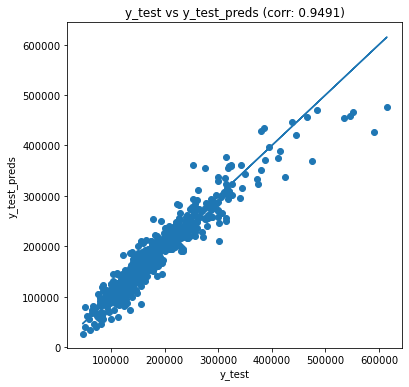

In [227]:
plt.figure(figsize=(6,6))

plt.scatter(x=y_test,y=y_test_preds)
cor = np.corrcoef(y_test,y_test_preds)
plt.plot(y_test,y_test)

plt.xlabel('y_test')
plt.ylabel('y_test_preds')
plt.title(f"y_test vs y_test_preds (corr: {cor[0][1].round(4)})");

Score without outliers

====== Linear Log Model ======
train r2: 0.9096436315993874
test_r2: 0.8971717311224767
mean cross val: [0.9174 0.889  0.9148 0.9074 0.8908]
train rmse: 20884.61
test rmse: 23960.07

In [228]:
y_test,y_test_preds = linreg_log(X,y,0.3,True)

====== Linear Log Model ======
train r2: 0.9136106936777603
test_r2: 0.9142384518151994
mean cross val: [0.8975 0.9002 0.9231 0.9047 0.8948]
train rmse: 20502.16
test rmse: 20936.96


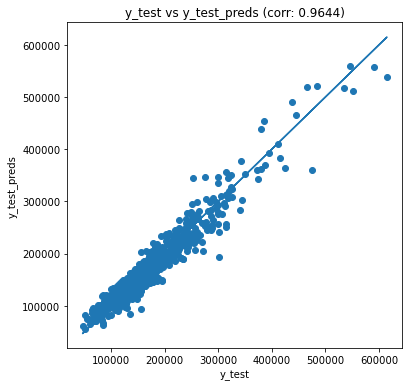

In [229]:
plt.figure(figsize=(6,6))

plt.scatter(x=y_test,y=y_test_preds)
cor = np.corrcoef(y_test,y_test_preds)
plt.plot(y_test,y_test)

plt.xlabel('y_test')
plt.ylabel('y_test_preds')
plt.title(f"y_test vs y_test_preds (corr: {cor[0][1].round(4)})");

## ====== Linear Log Model ======
Latest Score
- train r2: 0.9098833347756539
- test_r2: 0.9138436058385769
- mean cross val: [0.9186 0.8883 0.8884 0.9072 0.8951]
- train rmse: 21690.39
- test rmse: 21016.23


## Test

In [237]:
X_test.columns

Index(['lot_frontage', 'overall_quality', 'overall_condition', 'masonry_area',
       'central_air', 'bedroom_above_ground', 'kitchen_above_ground',
       'total_rooms_above_ground', 'functional', 'garage_cars', 'year_sold',
       'has_basement_sf', 'has_2nd_floor_sf', 'total_sf', 'all_bath',
       'has_open_porch', 'has_fireplace', 'has_wood_deck', 'log_lot_area',
       'external_quality_Fa', 'external_quality_Gd', 'external_quality_TA',
       'heating_quality_Fa', 'heating_quality_Gd', 'heating_quality_TA',
       'kitchen_quality_Gd', 'kitchen_quality_Ta', 'garage_fin_RFn',
       'garage_fin_Unf', 'lot_shape_Reg', 'building_type_2_fam_condo',
       'building_type_duplex', 'building_type_townhouse', 'house_style_2',
       'house_style_S', 'lot_slope_Not', 'condition_1_F', 'condition_1_N',
       'condition_1_P', 'condition_1_R', 'ms_zoning_Res', 'street_Pave',
       'sale_type_CON', 'sale_type_N', 'sale_type_W', 'sale_condition_Other',
       'sale_condition_P', 'lot_contour

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)
lr = LinearRegression()
y_train_log = np.log(y_train)
lr.fit(X_train,y_train_log)

LinearRegression()

Go back up to import test and clean data

In [231]:
num_cols = list(df.select_dtypes(exclude=object).columns)

In [232]:
cols = num_cols + cat_cols

In [233]:
# Test
X = df[cols]

In [234]:
X = pd.get_dummies(columns=list(X.select_dtypes(include='object').columns), data = X, drop_first=True)

In [235]:
## dummied category only in train data
for col in set(X.columns) - set(X_test.columns):
    X_test[col] = 0
    
## dummied category only in test data
for col in set(X_test.columns) - set(X.columns):
    X_test.drop(col, axis=1, inplace=True)

In [236]:
y_pred = lr.predict(X)

/Users/smile/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- log_sale_price
- sale_price
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 54 features, but LinearRegression is expecting 52 features as input.

In [ ]:
y_pred

In [ ]:
y_pred_exp = np.exp(y_pred)

In [ ]:
len(y_pred_exp)

In [ ]:
test = pd.read_csv('./datasets/test.csv')

In [ ]:
test['Order']

In [ ]:
pred_df = pd.DataFrame({'Order':test['Order'], 'SalePrice':y_pred_exp})
pred_df

In [ ]:
pred_df.to_csv('submission.csv', index=False)

In [ ]:
X.columns

----